# Air Ticket Fare Prediction

In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### DATA INITIALIZATION

In [2]:
df = pd.read_csv(r"C:\Users\KIIT\Desktop\Kaggle_HRC\train.csv")

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,09-04-2019,Banglore,Delhi,04:00,06:50,2h 50m,non-stop,No info,3943.0
1,IndiGo,03-06-2019,Banglore,Delhi,08:30,11:20,2h 50m,non-stop,No info,4823.0
2,Jet Airways,09-06-2019,Mumbai,Hyderabad,19:35,21:05,1h 30m,non-stop,In-flight meal not included,3210.0
3,Multiple carriers,27-05-2019,Delhi,Cochin,12:50,21:00,8h 10m,1 stop,No info,7005.0
4,Air India,06-06-2019,Delhi,Cochin,06:50,07-06-2021 07:40,24h 50m,2 stops,No info,13381.0
...,...,...,...,...,...,...,...,...,...,...
8528,Air India,09-03-2019,Delhi,Cochin,22:00,10-03-2021 19:15,21h 15m,2 stops,No info,16373.0
8529,Vistara,27-05-2019,Banglore,Delhi,17:00,19:35,2h 35m,non-stop,No info,4878.0
8530,Vistara,24-03-2019,Chennai,Kolkata,07:05,09:20,2h 15m,non-stop,No info,4842.0
8531,Air India,09-03-2019,Delhi,Cochin,04:00,10-03-2021 07:40,27h 40m,1 stop,No info,10315.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          8533 non-null   object 
 1   Date_of_Journey  8533 non-null   object 
 2   Source           8533 non-null   object 
 3   Destination      8533 non-null   object 
 4   Dep_Time         8533 non-null   object 
 5   Arrival_Time     8533 non-null   object 
 6   Duration         8533 non-null   object 
 7   Total_Stops      8533 non-null   object 
 8   Additional_Info  8533 non-null   object 
 9   Price            8533 non-null   float64
dtypes: float64(1), object(9)
memory usage: 666.8+ KB


In [5]:
df.isnull().any()   #No null values

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
dtype: bool

#### Pre-Processing

In [6]:
df.sort_values('Date_of_Journey' , inplace = True)  #Sorting by time, since temporal data

In [7]:
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time']).dt.time    #Converting to Datetime Format
df['Dep_Time'] = pd.to_datetime(df['Dep_Time']).dt.time
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [8]:
#Extracting Integer values from duration
df['Duration'] =  dict(df['Duration'].str.split('h' , expand = True))[0]    
df['Duration'] = df['Duration'].str.split('m' , expand = True)[0]
df['Duration'] = list(map(int , df['Duration']))

In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
5078,Air India,2019-01-03,Banglore,New Delhi,11:50:00,13:00:00,25,1 stop,1 Long layover,15434.0
7554,Jet Airways,2019-01-03,Banglore,New Delhi,08:00:00,07:40:00,23,1 stop,No info,22270.0
4362,Air India,2019-01-03,Banglore,New Delhi,08:50:00,09:25:00,24,2 stops,No info,25430.0
773,Air India,2019-01-03,Banglore,New Delhi,00:30:00,20:30:00,20,1 stop,1 Long layover,14752.0
6876,IndiGo,2019-01-03,Banglore,New Delhi,05:15:00,10:00:00,4,1 stop,No Info,8064.0


### Train Val Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train, val  = train_test_split(df, test_size=0.15, shuffle = False)   #Train Val and Test set Split

#### EDA

>ALL the EDA Parts are then Realized in Feature Engineering

In [12]:
train.describe()

,Duration,Price
count,7253.000000,7253.000000
mean,10.238384,9160.810699
std,8.534790,4433.047739
min,1.000000,1759.000000
25%,2.000000,5298.000000
50%,8.000000,8529.000000
75%,15.000000,12395.000000
max,47.000000,31945.000000


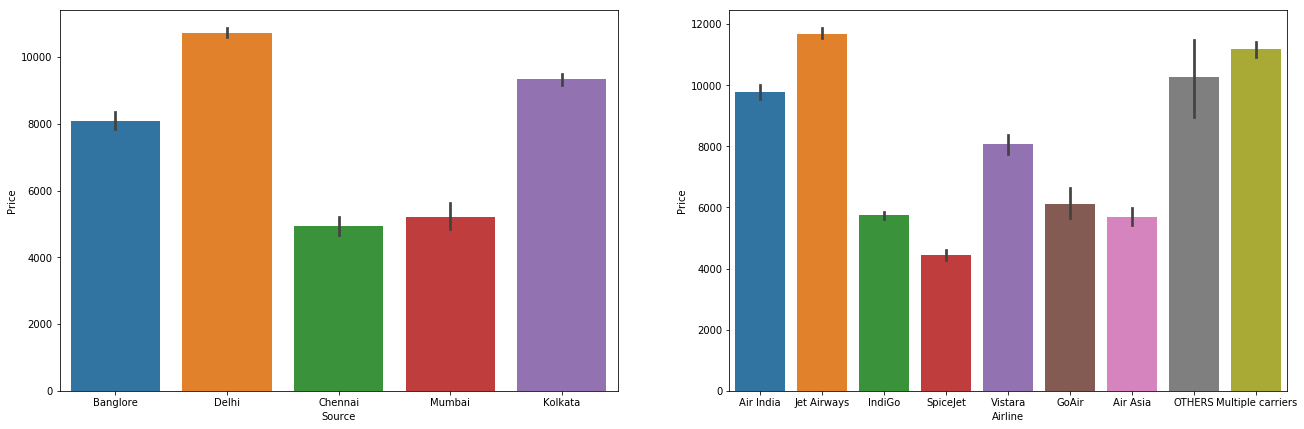

In [13]:
fig,ax=plt.subplots(1,2,figsize=(22,7))
sns.barplot(train['Source'] , train['Price'] , ax = ax[0])
sns.barplot(train['Airline'] , train['Price'] , ax = ax[1])

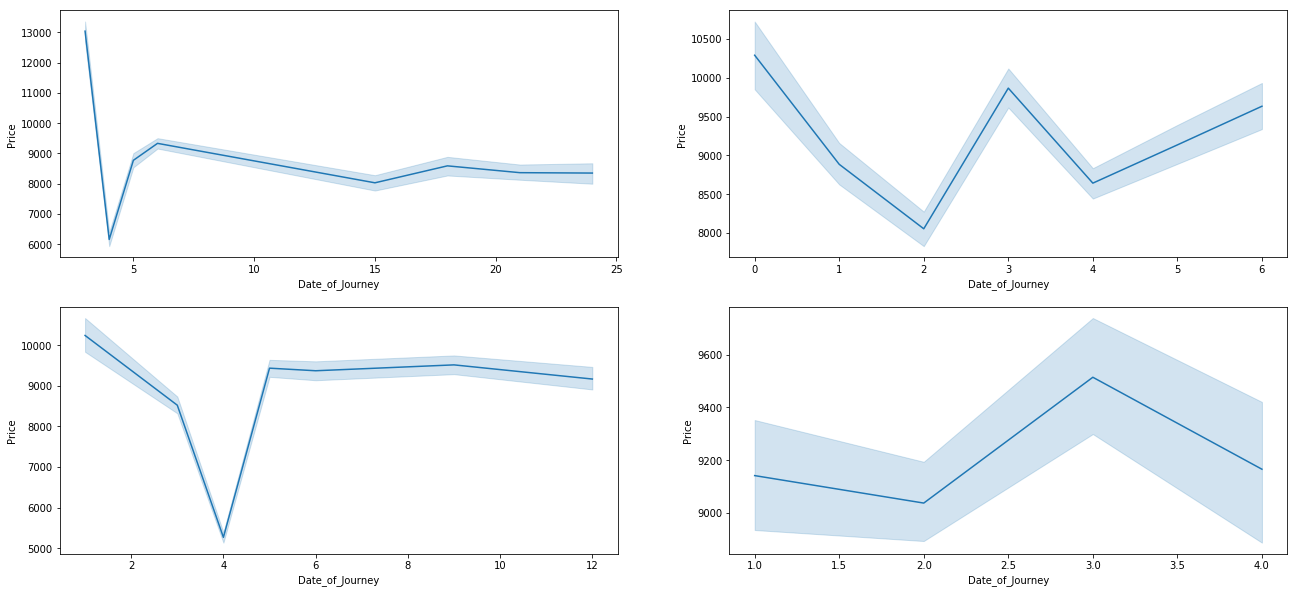

In [14]:
fig,ax=plt.subplots(2,2,figsize=(22,10))
sns.lineplot(train['Date_of_Journey'].dt.day, train['Price'] , ax=ax[0][0])
sns.lineplot(train['Date_of_Journey'].dt.dayofweek, train['Price'] , ax=ax[0][1])
sns.lineplot(train['Date_of_Journey'].dt.month, train['Price'], ax=ax[1][0])
sns.lineplot(train['Date_of_Journey'].dt.quarter, train['Price'], ax=ax[1][1])
plt.show()

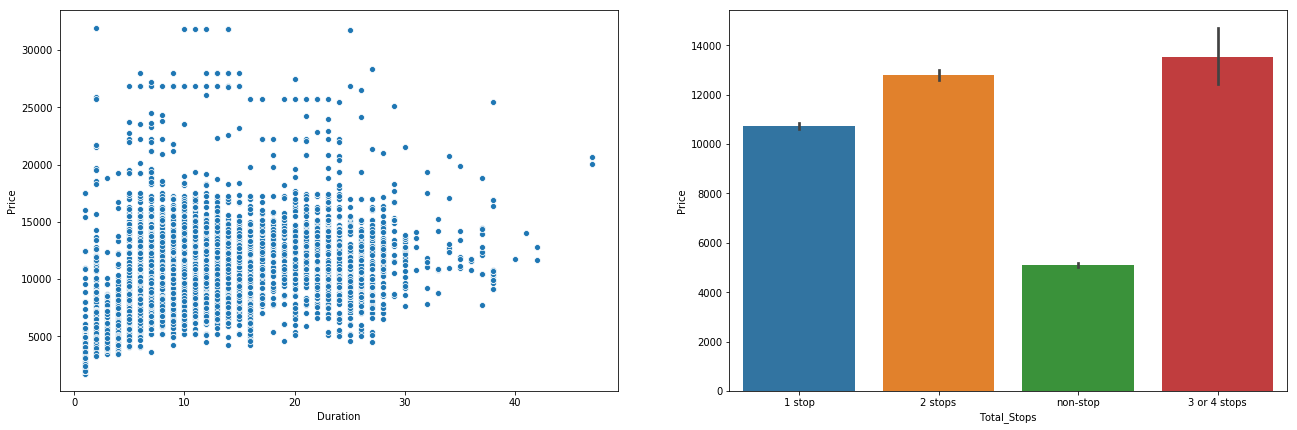

In [15]:
fig,ax=plt.subplots(1,2,figsize=(22,7))
sns.scatterplot(train['Duration'] , train['Price'] , ax = ax[0])
sns.barplot(train['Total_Stops'] , train['Price'] , ax = ax[1])

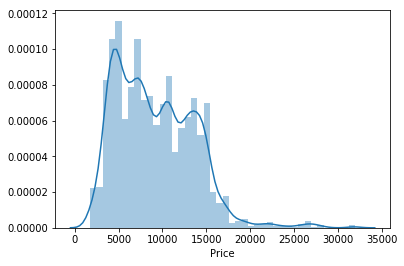

In [16]:
sns.distplot(train['Price'])

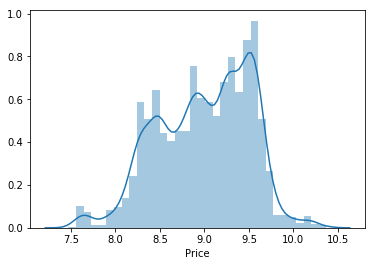

In [17]:
sns.distplot(np.log(train['Price']))

In [18]:
print(train['Airline'].unique())
print(train['Destination'].unique())
print(train['Total_Stops'].unique())

['Air India' 'Jet Airways' 'IndiGo' 'SpiceJet' 'Vistara' 'GoAir'
 'Air Asia' 'OTHERS' 'Multiple carriers']
['New Delhi' 'Cochin' 'Kolkata' 'Hyderabad' 'Banglore' 'Delhi']
['1 stop' '2 stops' 'non-stop' '3 or 4 stops']


#### Feature Engineering

In [19]:
pd.options.mode.chained_assignment = None    

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
#Label Encoding Categorical Features
enc = LabelEncoder()
enc.fit(train['Airline'])
train['Airline_enc']= enc.transform(train['Airline'])
val['Airline_enc'] = enc.transform(val['Airline'])
enc2= LabelEncoder()
enc2.fit(train['Destination'])
train['Destination_enc']= enc2.transform(train['Destination'])
val['Destination_enc']= enc2.transform(val['Destination'])
enc3= LabelEncoder()
enc3.fit(train['Total_Stops'])
train['Total_Stops_enc']= enc3.transform(train['Total_Stops'])
val['Total_Stops_enc'] = enc3.transform(val['Total_Stops'])
enc4= LabelEncoder()
enc4.fit(train['Source'])
train['Source_enc']= enc4.transform(train['Source'])
val['Source_enc']= enc4.transform(val['Source'])

In [22]:
#Based on the Date_of_Journey vs Price relations we found from EDA
train['due_day_neg'] = np.where(train['Date_of_Journey'].dt.day ==4,1,0)
train['week_day_pos'] = np.where(train['Date_of_Journey'].dt.dayofweek ==3,1,0)
train['month_4_pos'] = np.where(train['Date_of_Journey'].dt.month ==4,1,0)
train['quarter_pos'] = np.where(train['Date_of_Journey'].dt.quarter ==3,1,0)
train['weekpos2'] = np.where(train['Date_of_Journey'].dt.dayofweek ==0,1,0)
train['weekpos3'] = np.where(train['Date_of_Journey'].dt.dayofweek ==6,1,0)


val['due_day_neg'] = np.where(val['Date_of_Journey'].dt.day ==4,1,0)
val['week_day_pos'] = np.where(val['Date_of_Journey'].dt.dayofweek ==3,1,0)
val['month_4_pos'] = np.where(val['Date_of_Journey'].dt.month ==4,1,0)
val['quarter_pos'] = np.where(val['Date_of_Journey'].dt.quarter ==3,1,0)
val['weekpos2'] = np.where(val['Date_of_Journey'].dt.dayofweek ==0,1,0)
val['weekpos3'] = np.where(val['Date_of_Journey'].dt.dayofweek ==6,1,0)

In [23]:
#Extracting Meaniningful features from Date of Journey
train['Date_of_Journey_day']  = train['Date_of_Journey'].dt.day
train['Date_of_Journey_week']  = train['Date_of_Journey'].dt.dayofweek
train['Date_of_Journey_month'] = train['Date_of_Journey'].dt.month
train['Date_of_Journey_quarter'] = train['Date_of_Journey'].dt.quarter

val['Date_of_Journey_day']  = val['Date_of_Journey'].dt.day
val['Date_of_Journey_week']  = val['Date_of_Journey'].dt.dayofweek
val['Date_of_Journey_month'] = val['Date_of_Journey'].dt.month
val['Date_of_Journey_quarter'] = val['Date_of_Journey'].dt.quarter

#### Feature Selection

Using filter methods

In [24]:
corr=train[['Duration',
            'Airline_enc',
            'Destination_enc',
                 'Source_enc',
            'Total_Stops_enc',
    'Date_of_Journey_day',
    'Date_of_Journey_month',
            'Date_of_Journey_week',
            'Date_of_Journey_quarter',
            'week_day_pos',
                 'weekpos2',
                 'weekpos3',
            'month_4_pos',
            'quarter_pos',
           'Price']].corr()

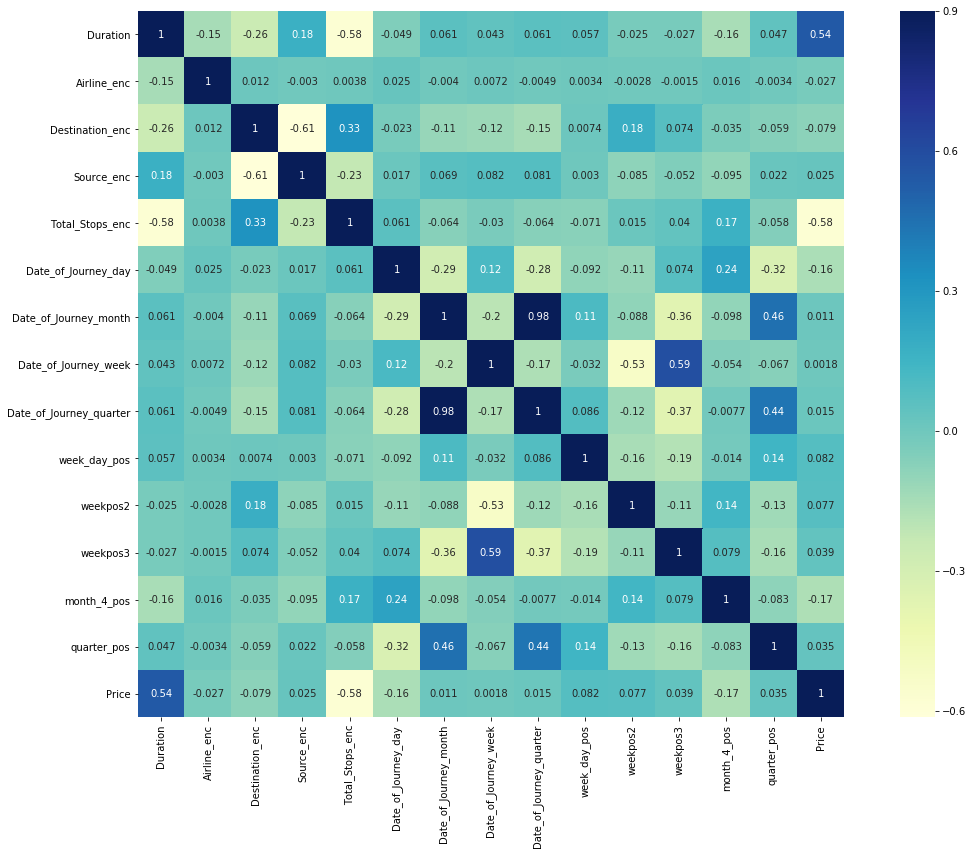

In [25]:
fig1,ax1=plt.subplots(figsize=(8,8))
fig1.set_size_inches(20,13)
sns.heatmap(corr,vmax=.9, square=True,ax=ax1,annot=True, cmap="YlGnBu")


> Looking at the correlation matrix, it seems like none of the features would be too mandatory to drop

In [26]:
x_train = train[['Duration',
            'Airline_enc',
            'Destination_enc',
                 'Source_enc',
            'Total_Stops_enc',
    'Date_of_Journey_day',
    'Date_of_Journey_month',
            'Date_of_Journey_week',
            'Date_of_Journey_quarter',
            'week_day_pos',
                 'weekpos2',
                 'weekpos3',
            'month_4_pos',
            'quarter_pos']]
y_train = train['Price']
y_train_ln = np.log(train['Price'])    #Taking the log transform here

x_test = val[['Duration',
            'Airline_enc',
            'Destination_enc',
              'Source_enc',
            'Total_Stops_enc',
    'Date_of_Journey_day',
    'Date_of_Journey_month',
            'Date_of_Journey_week',
            'Date_of_Journey_quarter',
            'week_day_pos',
                 'weekpos2',
                 'weekpos3',
            'month_4_pos',
            'quarter_pos']]
y_test = val['Price']
y_test_ln = np.log(val['Price'])   #Taking the log transform here

In [27]:
y_train

5078    15434.0
7554    22270.0
4362    25430.0
773     14752.0
6876     8064.0
         ...   
7056     8452.0
992      3257.0
735      7335.0
4749    10413.0
5105    10844.0
Name: Price, Length: 7253, dtype: float64

In [28]:
from sklearn.feature_selection import VarianceThreshold

In [29]:
#Removing quasi constant features
sel = VarianceThreshold(threshold = 0.01)
sel.fit(x_train)
sum(sel.get_support())
non_const = x_train.columns[sel.get_support()]
len(non_const)

14

In [30]:
q_constant_col = [col for col in x_train.columns if col not in non_const]
q_constant_col
print(f"Quasi-const var count = {len(q_constant_col)}")
print("Quasi Const",q_constant_col)
print("Non Quasi Const",non_const)

Quasi-const var count = 0
Quasi Const []
Non Quasi Const Index(['Duration', 'Airline_enc', 'Destination_enc', 'Source_enc',
       'Total_Stops_enc', 'Date_of_Journey_day', 'Date_of_Journey_month',
       'Date_of_Journey_week', 'Date_of_Journey_quarter', 'week_day_pos',
       'weekpos2', 'weekpos3', 'month_4_pos', 'quarter_pos'],
      dtype='object')


In [31]:
x_train.drop(q_constant_col , axis = 1,inplace= True)        #Dropping quasi constant features
x_test.drop(q_constant_col , axis = 1, inplace= True)

> No quasi constant features to drop

In [32]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 5078 to 5105
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Duration                 7253 non-null   int64
 1   Airline_enc              7253 non-null   int32
 2   Destination_enc          7253 non-null   int32
 3   Source_enc               7253 non-null   int32
 4   Total_Stops_enc          7253 non-null   int32
 5   Date_of_Journey_day      7253 non-null   int64
 6   Date_of_Journey_month    7253 non-null   int64
 7   Date_of_Journey_week     7253 non-null   int64
 8   Date_of_Journey_quarter  7253 non-null   int64
 9   week_day_pos             7253 non-null   int32
 10  weekpos2                 7253 non-null   int32
 11  weekpos3                 7253 non-null   int32
 12  month_4_pos              7253 non-null   int32
 13  quarter_pos              7253 non-null   int32
dtypes: int32(9), int64(5)
memory usage: 915.0 KB


#### Model Tranning

In [33]:
modifier = []      #To save the name of models
model_train = []     #To save the train set RMSE score
model_test = []      #To save the test set RMSE score

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [35]:
reg1 = RandomForestRegressor(criterion = 'mse')
reg1.fit(x_train, y_train)

# Predicting the Test Set Results
predicted_train = reg1.predict(x_train)
predicted = reg1.predict(x_test)

In [36]:
print(np.sqrt(mean_squared_error(y_train, predicted_train)))
print(np.sqrt(mean_squared_error(y_test, predicted)))
modifier.append('No_Tranform')
model_train.append(np.sqrt(mean_squared_error(y_train, predicted_train)))
model_test.append(np.sqrt(mean_squared_error(y_test, predicted)))

1451.8818807633468
1977.7495681449145


In [37]:
print(max(y_train) , max(predicted_train))
print(max(y_test) , max(predicted))

31945.0 29334.443404761907
19644.0 18111.376666666663


In [38]:
reg2 = RandomForestRegressor(criterion = 'mse')
reg2.fit(x_train, y_train_ln)

# Predicting the Test Set Results
predicted_train = reg2.predict(x_train)
predicted = reg2.predict(x_test)

In [39]:
print(np.sqrt(mean_squared_error(y_train_ln, predicted_train)))
print(np.sqrt(mean_squared_error(y_test_ln, predicted)))
modifier.append('log_Tranform')
model_train.append(np.sqrt(mean_squared_error(y_train_ln, predicted_train)))
model_test.append(np.sqrt(mean_squared_error(y_test_ln, predicted)))

0.15302806992247778
0.21725988795369067


In [40]:
new_df = pd.DataFrame({"Transform": modifier , "Tranning":model_train , "Testing":model_test})

In [41]:
print("Random Forrest regression")
new_df

Random Forrest regression


,Transform,Tranning,Testing
0,No_Tranform,1451.881881,1977.749568
1,log_Tranform,0.153028,0.217260


As we see there is a significant difference in RMSE error in both the cases, we can take either of them as there isnt a good metric for RMSE errors apart from comparing the tranning and testing error, As we can see it depends upon the range of Target Variables. We will take the one with Log transform as thats more pleasant to our eyes

#### Running it on Test Set

In [79]:
df = pd.read_csv(r"C:\Users\KIIT\Desktop\Kaggle_HRC\test.csv")

In [80]:
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time']).dt.time    #Converting to Datetime Format
df['Dep_Time'] = pd.to_datetime(df['Dep_Time']).dt.time
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [81]:
#Extracting Integer values from duration
df['Duration'] =  dict(df['Duration'].str.split('h' , expand = True))[0]    
df['Duration'] = df['Duration'].str.split('m' , expand = True)[0]
df['Duration'] = list(map(int , df['Duration']))

In [82]:
test=df

In [83]:
enc = LabelEncoder()
enc.fit(test['Airline'])
test['Airline_enc']= enc.transform(test['Airline'])
enc2= LabelEncoder()
enc2.fit(test['Destination'])
test['Destination_enc']= enc2.transform(test['Destination'])
enc3= LabelEncoder()
enc3.fit(test['Total_Stops'])
test['Total_Stops_enc']= enc3.transform(test['Total_Stops'])
enc4= LabelEncoder()
enc4.fit(test['Source'])
test['Source_enc']= enc4.transform(test['Source'])

In [84]:
test['due_day_neg'] = np.where(test['Date_of_Journey'].dt.day ==4,1,0)
test['week_day_pos'] = np.where(test['Date_of_Journey'].dt.dayofweek ==3,1,0)
test['month_4_pos'] = np.where(test['Date_of_Journey'].dt.month ==4,1,0)
test['quarter_pos'] = np.where(test['Date_of_Journey'].dt.quarter ==3,1,0)
test['weekpos2'] = np.where(test['Date_of_Journey'].dt.dayofweek ==0,1,0)
test['weekpos3'] = np.where(test['Date_of_Journey'].dt.dayofweek ==6,1,0)

In [85]:
test['Date_of_Journey_day']  = test['Date_of_Journey'].dt.day
test['Date_of_Journey_week']  = test['Date_of_Journey'].dt.dayofweek
test['Date_of_Journey_month'] = test['Date_of_Journey'].dt.month
test['Date_of_Journey_quarter'] = test['Date_of_Journey'].dt.quarter

In [86]:
x_test = test[['Duration',
            'Airline_enc',
            'Destination_enc',
              'Source_enc',
            'Total_Stops_enc',
    'Date_of_Journey_day',
    'Date_of_Journey_month',
        'Date_of_Journey_week',
        'Date_of_Journey_quarter',
            'week_day_pos',
                 'weekpos2',
                 'weekpos3',
            'month_4_pos',
            'quarter_pos']]

In [87]:
predicted_normal = reg1.predict(x_test)
predicted_ln = reg2.predict(x_test)

In [88]:
test['Price_predicted_ln'] = np.exp(predicted_ln)
test['Price_predicted'] = predicted_normal

In [89]:
test[['Price_predicted', 'Price_predicted_ln' ]]

,Price_predicted,Price_predicted_ln
0,7857.990000,7709.974363
1,5922.663333,5926.858054
2,15532.090000,15634.048600
3,3847.195302,3846.255178
4,4796.712172,4891.137689
...,...,...
2129,5182.993333,5179.531766
2130,7379.026333,7357.347353
2131,9648.677930,9409.544702
2132,16171.576833,15832.236461


In [101]:
test['Price'] = test[['Price_predicted_ln' ]]

In [91]:
test['Price'] = test[['Price_predicted' ]]

In [92]:
test['Price']

0        7857.990000
1        5922.663333
2       15532.090000
3        3847.195302
4        4796.712172
            ...     
2129     5182.993333
2130     7379.026333
2131     9648.677930
2132    16171.576833
2133     5499.334171
Name: Price, Length: 2134, dtype: float64

In [113]:
test['Id'] = [i for i in range(len(test['Price']))]

In [115]:
test['Id']

0          0
1          1
2          2
3          3
4          4
        ... 
2129    2129
2130    2130
2131    2131
2132    2132
2133    2133
Name: Id, Length: 2134, dtype: int64

### I have taken the log transform prediction in the Submission

In [117]:
#Contains Price Predicted by both the methods

test[['Id', 'Price']].to_csv('submission.csv' ,index = False)

###  END OF NOTEBOOK